# DAY-AHEAD DATA EXPLORATION

## Tested on ENTSO-E data from 24/01/2025
- Prices
- Load
- Generation
--> hourly granularity

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

repo_root = Path("..").resolve()
sys.path.append(str(repo_root))

#Load price data test
from Source.load_data import load_day_ahead_test

energy_prices_test = load_day_ahead_test()

#Load generation and load data test
from Source.load_data import load_generation_test
from Source.load_data import load_load_test

generation_test = load_generation_test()

generation_avg_actual = (
    generation_test
    .groupby(generation_test.index // 4)["Actual Generation (MW)"]
    .mean()
    .reset_index(drop=True)
)

generation_avg_forecast = (
    generation_test
    .groupby(generation_test.index // 4)["Generation Forecast (MW)"]
    .mean()
    .reset_index(drop=True)
)


load_test = load_load_test()

load_avg_actual = (
    load_test
    .groupby(load_test.index // 4)["Actual Total Load (MW)"]
    .mean()
    .reset_index(drop=True)
)

load_avg_forecast = (
    load_test
    .groupby(load_test.index // 4)["Day-ahead Total Load Forecast (MW)"]
    .mean()
    .reset_index(drop=True)
)

#Load generation data test
from Source.load_data import load_onshore_wind_test
from Source.load_data import load_offshore_wind_test
from Source.load_data import load_solar_test

onshore_test = load_onshore_wind_test()
offshore_test = load_offshore_wind_test()
solar_test = load_solar_test()

df_onshore_test_actual = (
    onshore_test
    .groupby(onshore_test.index // 4)["Actual (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_onshore_test_forecast = (
    onshore_test
    .groupby(onshore_test.index // 4)["Day-ahead (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_onshore_test_actual = (
    onshore_test
    .groupby(onshore_test.index // 4)["Actual (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_onshore_test_forecast = (
    onshore_test
    .groupby(onshore_test.index // 4)["Day-ahead (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_offshore_test_actual = (
    offshore_test
    .groupby(offshore_test.index // 4)["Actual (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_offshore_test_forecast = (
    offshore_test
    .groupby(offshore_test.index // 4)["Day-ahead (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_solar_test_actual = (
    solar_test
    .groupby(solar_test.index // 4)["Actual (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_solar_test_forecast = (
    solar_test
    .groupby(solar_test.index // 4)["Day-ahead (MW)"]
    .mean()
    .reset_index(drop=True)
)

energy_prices_test.insert(3,'Actual Total Load (MW)',load_avg_actual)
energy_prices_test.insert(4,'Day-ahead Total Load Forecast (MW)',load_avg_forecast)
energy_prices_test.insert(5,'Day-ahead Onshore Wind Actual (MW)',df_onshore_test_actual)
energy_prices_test.insert(6,'Day-ahead Offshore Wind Actual (MW)',df_offshore_test_actual)
energy_prices_test.insert(7,'Day-ahead Solar Actual (MW)',df_solar_test_actual)
energy_prices_test.insert(8,'Day-ahead Onshore Wind Forecast (MW)',df_onshore_test_forecast)
energy_prices_test.insert(9,'Day-ahead Offshore Wind Forecast (MW)',df_offshore_test_forecast)
energy_prices_test.insert(10,'Day-ahead Solar Forecast (MW)',df_solar_test_forecast)



df_market_focus = energy_prices_test.drop(columns=["Sequence","Intraday Period (CET/CEST)","Intraday Price (EUR/MWh)"])

df_market_focus.tail()

total_renewables_actual = df_onshore_test_actual + df_offshore_test_actual + df_solar_test_actual
total_renewables_forecast = df_onshore_test_forecast + df_offshore_test_forecast + df_solar_test_forecast


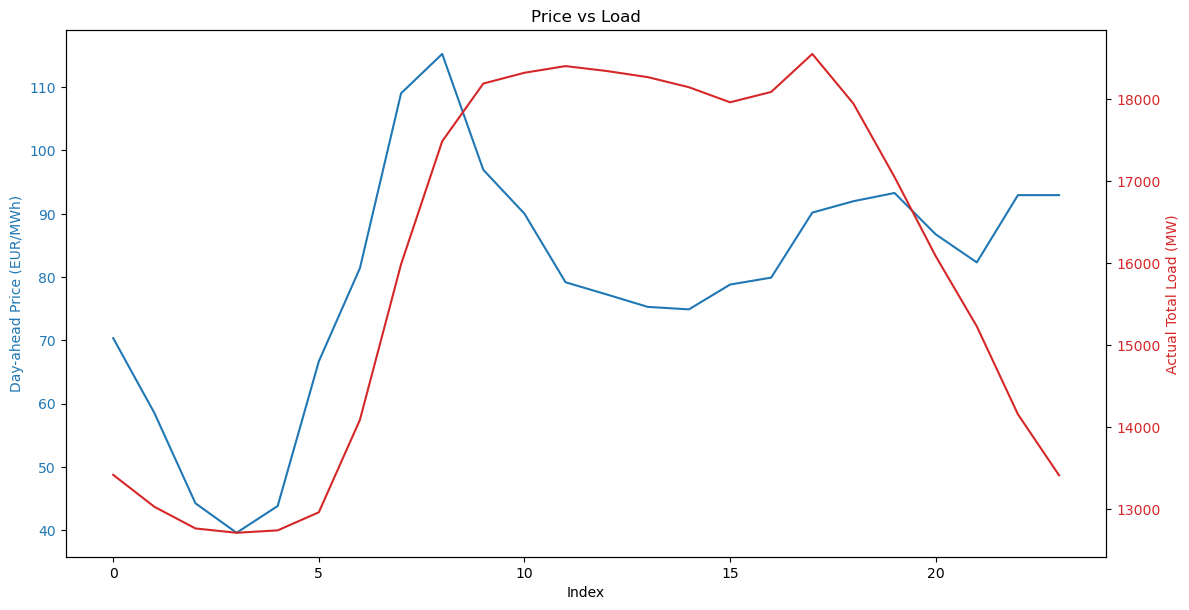

In [9]:
fig, ax1 = plt.subplots(figsize=(12,6))

x = df_market_focus.index

color = 'tab:blue'
ax1.set_xlabel('Index')  # o 'Date'
ax1.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
ax1.plot(x, df_market_focus['Day-ahead Price (EUR/MWh)'], color=color, label='Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Actual Total Load (MW)', color=color)
ax2.plot(x, df_market_focus['Actual Total Load (MW)'], color=color, label='Load')
ax2.tick_params(axis='y', labelcolor=color)

# Layout e titolo
fig.tight_layout()
plt.title("Price vs Load")
plt.show()

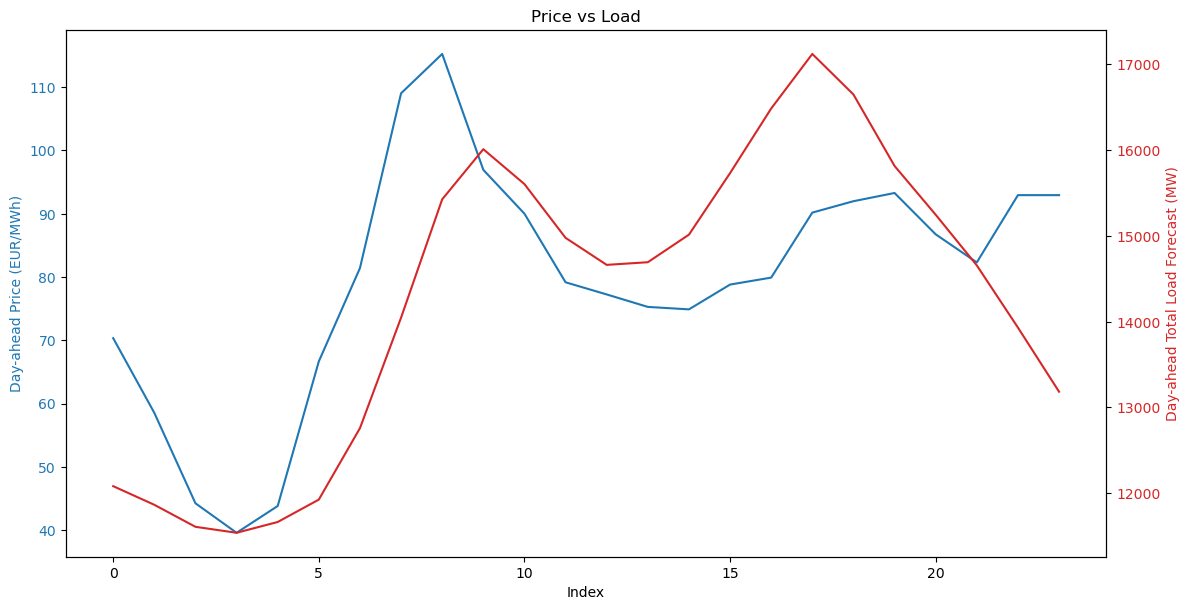

In [10]:
fig, ax1 = plt.subplots(figsize=(12,6))

x = df_market_focus.index

color = 'tab:blue'
ax1.set_xlabel('Index')  # o 'Date'
ax1.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
ax1.plot(x, df_market_focus['Day-ahead Price (EUR/MWh)'], color=color, label='Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Day-ahead Total Load Forecast (MW)', color=color)
ax2.plot(x, df_market_focus['Day-ahead Total Load Forecast (MW)'], color=color, label='Load')
ax2.tick_params(axis='y', labelcolor=color)

# Layout e titolo
fig.tight_layout()
plt.title("Price vs Load")
plt.show()

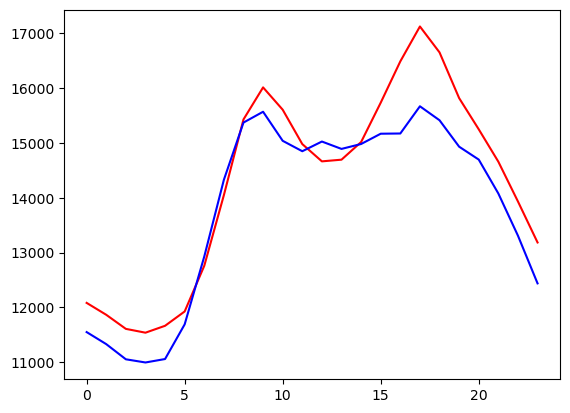

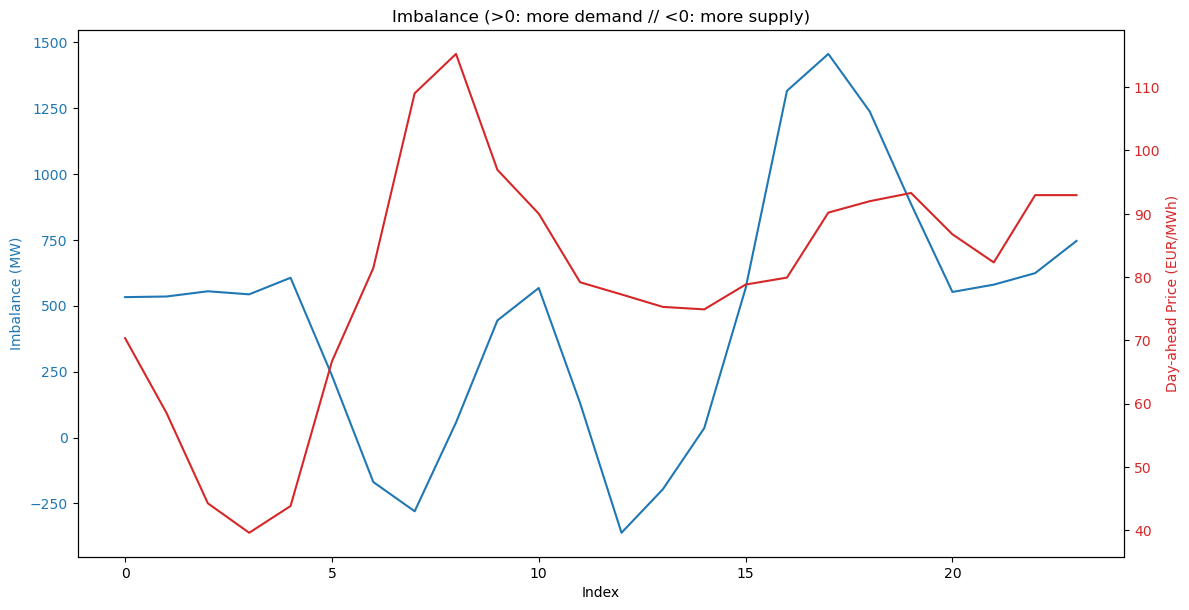

In [18]:
#Total generation from renewables and load

plt.plot(x,df_market_focus['Day-ahead Total Load Forecast (MW)'],'r', generation_avg_forecast, 'b')

imbalance = df_market_focus['Day-ahead Total Load Forecast (MW)'] - generation_avg_forecast

fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Index')
ax1.set_ylabel('Imbalance (MW)', color=color)
ax1.plot(x, imbalance, color=color, label='Imbalance')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
ax2.plot(x, df_market_focus['Day-ahead Price (EUR/MWh)'], color=color, label='Price')
ax2.tick_params(axis='y', labelcolor=color)

# Layout e titolo
fig.tight_layout()
plt.title("Imbalance (>0: more demand // <0: more supply)")
plt.show()


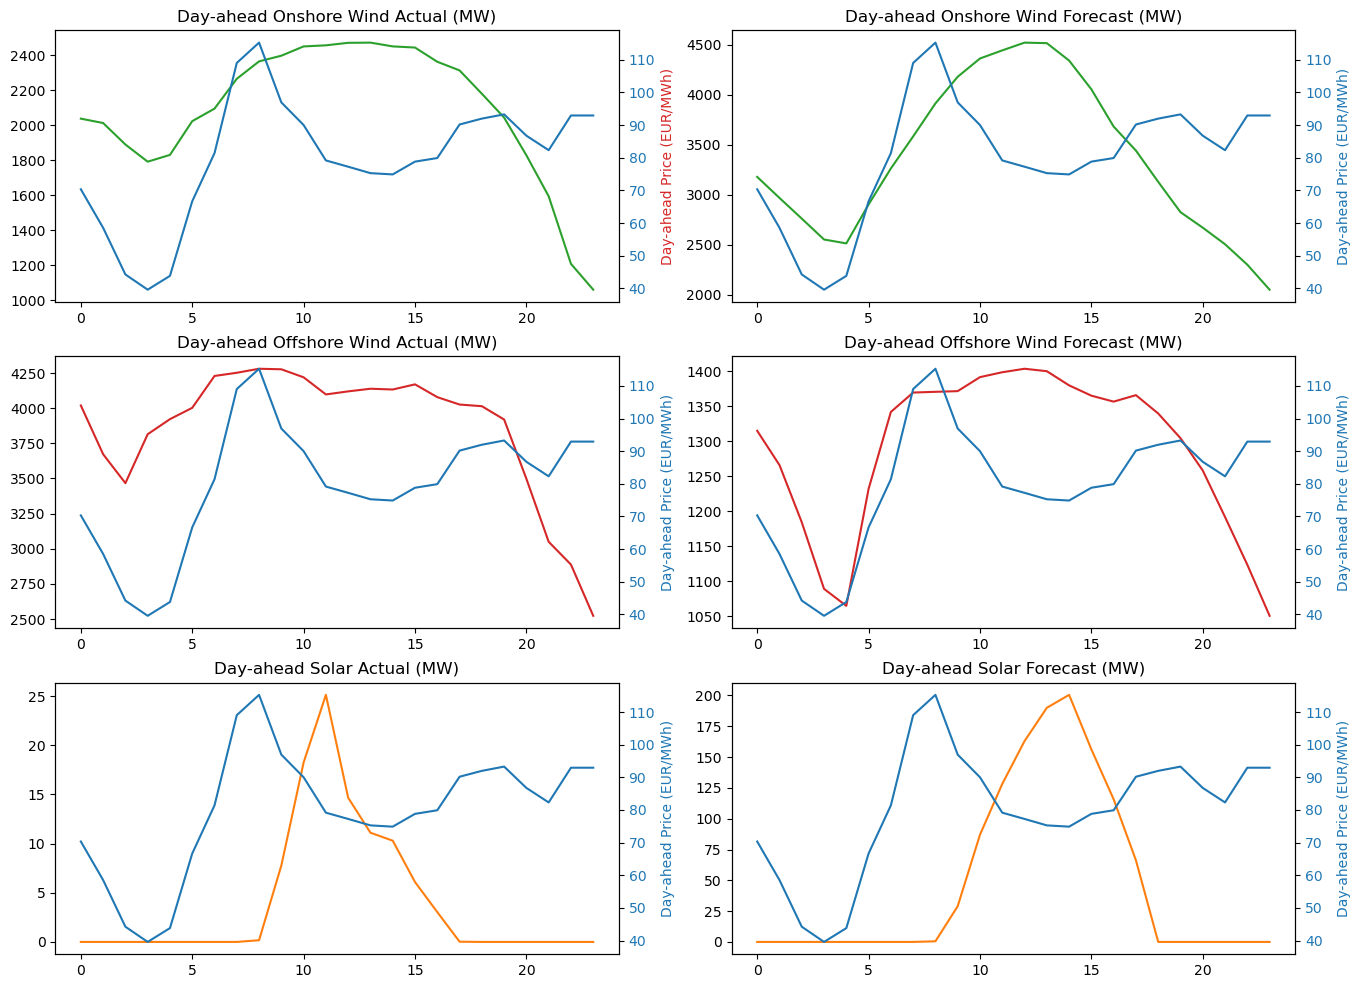

In [12]:
#Renewables generation <> price correlation (actual and forecast, per type of energy) 

fig, axs = plt.subplots(3, 2,figsize=(16,12))
axs[0, 0].plot(x, df_onshore_test_actual, 'tab:green')
axs[0, 0].set_title('Day-ahead Onshore Wind Actual (MW)')
ax0 = axs[0,0].twinx()
ax0.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
color = 'tab:blue'
ax0.plot(df_market_focus['Day-ahead Price (EUR/MWh)'],color=color, label='Price')
ax0.tick_params(axis='y', labelcolor=color)


axs[0, 1].plot(x, df_onshore_test_forecast, 'tab:green')
axs[0, 1].set_title('Day-ahead Onshore Wind Forecast (MW)')
ax0 = axs[0,1].twinx()
ax0.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
color = 'tab:blue'
ax0.plot(df_market_focus['Day-ahead Price (EUR/MWh)'],color=color, label='Price')
ax0.tick_params(axis='y', labelcolor=color)

axs[1, 0].plot(x, df_offshore_test_actual, 'tab:red')
axs[1, 0].set_title('Day-ahead Offshore Wind Actual (MW)')
ax0 = axs[1,0].twinx()
ax0.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
color = 'tab:blue'
ax0.plot(df_market_focus['Day-ahead Price (EUR/MWh)'],color=color, label='Price')
ax0.tick_params(axis='y', labelcolor=color)

axs[1, 1].plot(x, df_offshore_test_forecast, 'tab:red')
axs[1, 1].set_title('Day-ahead Offshore Wind Forecast (MW)')
ax0 = axs[1,1].twinx()
ax0.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
color = 'tab:blue'
ax0.plot(df_market_focus['Day-ahead Price (EUR/MWh)'],color=color, label='Price')
ax0.tick_params(axis='y', labelcolor=color)

axs[2, 0].plot(x, df_solar_test_actual, 'tab:orange')
axs[2, 0].set_title('Day-ahead Solar Actual (MW)')
ax0 = axs[2,0].twinx()
ax0.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
color = 'tab:blue'
ax0.plot(df_market_focus['Day-ahead Price (EUR/MWh)'],color=color, label='Price')
ax0.tick_params(axis='y', labelcolor=color)

axs[2, 1].plot(x, df_solar_test_forecast, 'tab:orange')
axs[2, 1].set_title('Day-ahead Solar Forecast (MW)')
ax0 = axs[2,1].twinx()
ax0.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
color = 'tab:blue'
ax0.plot(df_market_focus['Day-ahead Price (EUR/MWh)'],color=color, label='Price')
ax0.tick_params(axis='y', labelcolor=color)


Onshore corr: 0.26


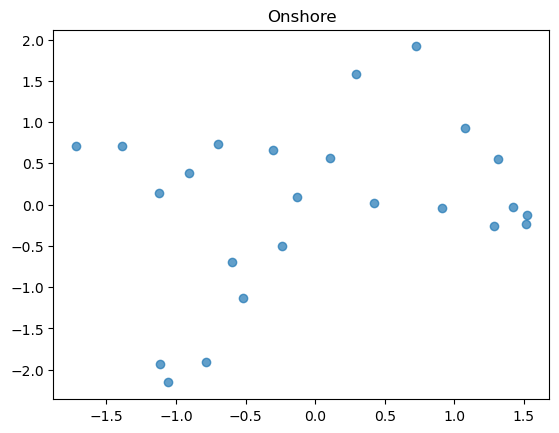

Offshore corr: 0.46


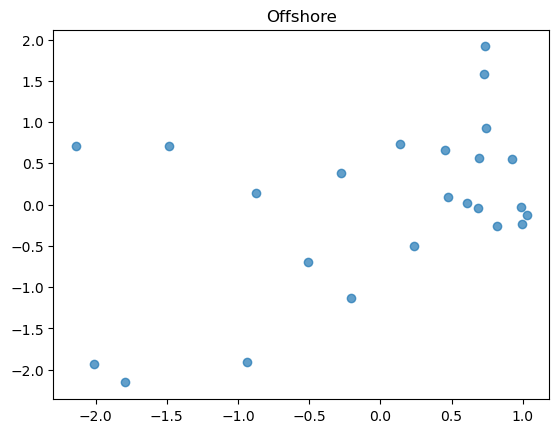

Solar corr: -0.01


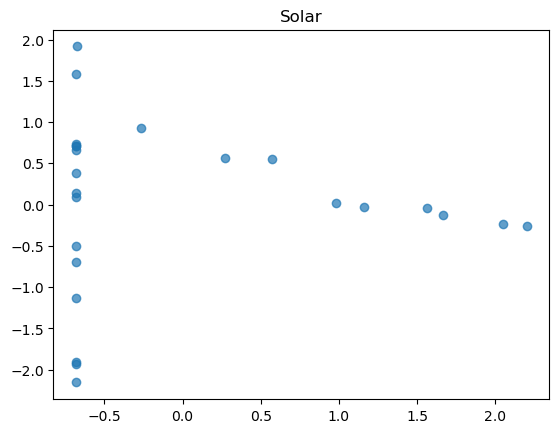

In [ ]:
#Visualize correlation (e.g. onshore day-ahead forecast vs price)


from sklearn.preprocessing import StandardScaler

price_col = 'Day-ahead Price (EUR/MWh)'
gen_col = 'Day-ahead (MW)'

df_onshore_test_forecast = df_onshore_test_forecast.to_frame(name=gen_col)
df_offshore_test_forecast = df_offshore_test_forecast.to_frame(name=gen_col)
df_solar_test_forecast = df_solar_test_forecast.to_frame(name=gen_col)


for name, df_forecast in {
    'Onshore': df_onshore_test_forecast,
    'Offshore': df_offshore_test_forecast,
    'Solar': df_solar_test_forecast
}.items():

    df = pd.concat(
        [df_forecast[[gen_col]], df_market_focus[[price_col]]],
        axis=1
    ).dropna()

    df[[gen_col, price_col]] = StandardScaler().fit_transform(df)

    print(f"{name} corr: {df[gen_col].corr(df[price_col]):.2f}")

    plt.scatter(df[gen_col], df[price_col], alpha=0.7)
    plt.title(name)
    plt.show()

Pearsons correlation> actual: 0.638
Pearsons correlation> day-ahead: 0.638


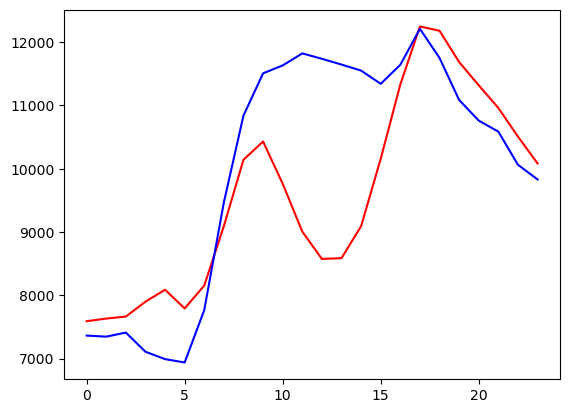

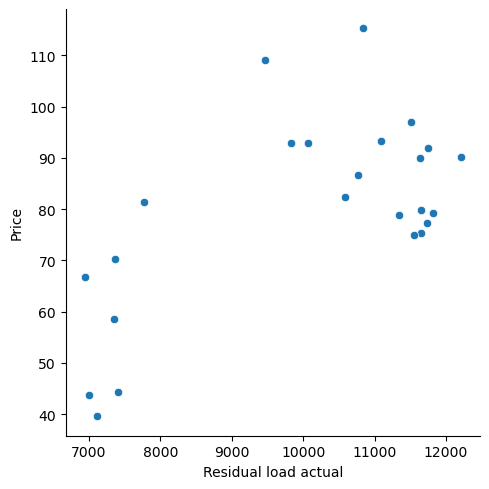

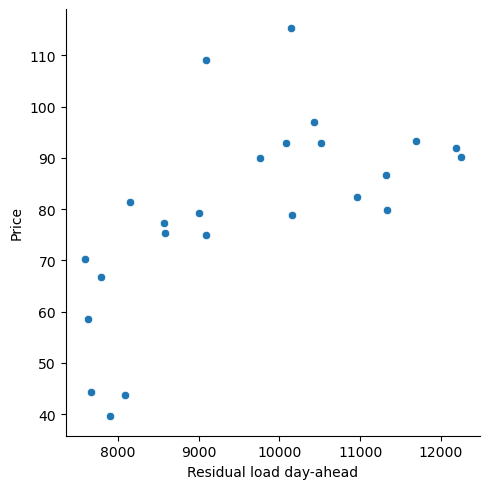

In [29]:
#Residual load correlation
from scipy.stats import pearsonr

residual_load_da = df_market_focus['Day-ahead Total Load Forecast (MW)'] - total_renewables_forecast
residual_load_actual = df_market_focus['Actual Total Load (MW)'] - total_renewables_actual

plt.plot(x,residual_load_da,'r', residual_load_actual, 'b')

price_load = pd.DataFrame({'Residual load actual':residual_load_actual,'Residual load day-ahead':residual_load_da,'Price': df_market_focus['Day-ahead Price (EUR/MWh)']})

price_load.head()

sns.relplot(x ="Residual load actual", y ="Price",
            data = price_load)
corr_actual, _ = pearsonr(residual_load_actual, df_market_focus['Day-ahead Price (EUR/MWh)'])
print('Pearsons correlation> actual: %.3f' % corr_actual)

sns.relplot(x ="Residual load day-ahead", y ="Price",
            data = price_load)
corr_da, _ = pearsonr(residual_load_da, df_market_focus['Day-ahead Price (EUR/MWh)'])
print('Pearsons correlation> day-ahead: %.3f' % corr_da)
